<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<AxesSubplot:xlabel='gdpp'>

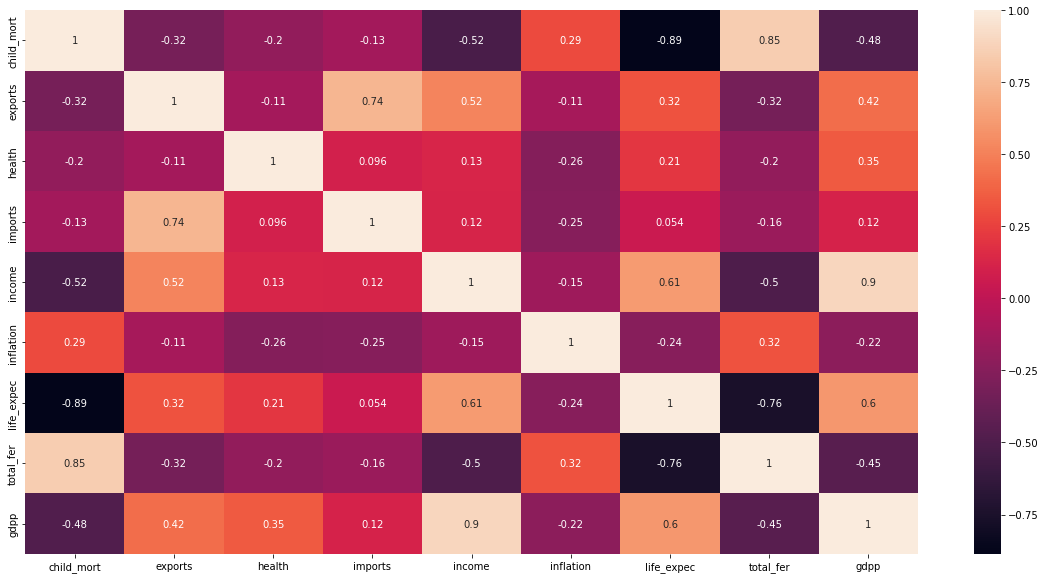

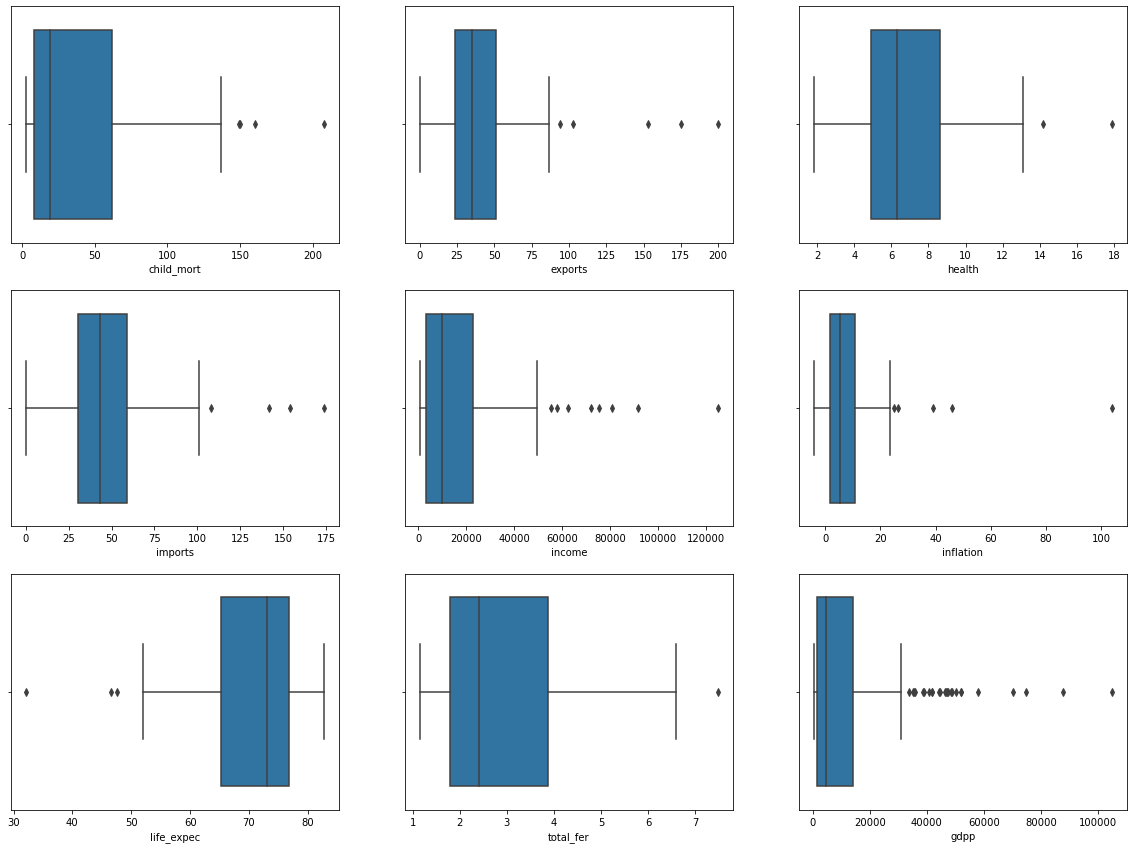

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import numpy as np

data = pd.read_csv(r"C:\Users\samba\Downloads\Country-data.csv")
data.head()
data.isna().sum().sum()
data.isnull().sum().sum()
data.info()

data1 = data.drop(["country"],axis = 1)
data1.describe()
data.sort_values(by = ["child_mort",'health','income','gdpp'],ascending = [False,True,True,True],inplace = True)
data.head()
cor = data1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(cor,annot = True)

scaler=StandardScaler()
data_scaled=scaler.fit_transform(data.iloc[:,1:])
data_scaled=pd.DataFrame(data_scaled,columns=data.iloc[:,1:].columns, index=data.index )
data_final=pd.concat([data.iloc[:,0],data_scaled],axis=1)

plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = data)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = data)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = data)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data =data)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = data)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = data)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = data)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = data)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = data)


C:\Users\samba\anaconda3\Library\sa\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samba\AppData\Local\Temp/ipykernel_10960/2541028951.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 8), css, 'bx-', color='green')


Top_5_undeveloped_countries : Haiti Sierra Leone Chad Mali Nigeria
Top_undeveloped_countries_immediate_fund :
(0, 'Haiti')
(1, 'Sierra Leone')
(2, 'Chad')
(3, 'Central African Republic')
(4, 'Mali')
(5, 'Nigeria')
(6, 'Niger')
(7, 'Angola')
(8, 'Burkina Faso')
(9, 'Congo, Dem. Rep.')
(10, 'Guinea-Bissau')
(11, 'Benin')
(12, "Cote d'Ivoire")
(13, 'Guinea')
(14, 'Cameroon')
(15, 'Mozambique')
(16, 'Lesotho')
(17, 'Mauritania')
(18, 'Burundi')
(19, 'Pakistan')
(20, 'Malawi')
(21, 'Togo')
(22, 'Afghanistan')
(23, 'Liberia')
(24, 'Comoros')
(25, 'Zambia')
(26, 'Uganda')
(27, 'Gambia')
(28, 'Lao')
(29, 'Sudan')
(30, 'Ghana')
(31, 'Tanzania')
(32, 'Senegal')
(33, 'Myanmar')
(34, 'Congo, Rep.')
(35, 'Gabon')
(36, 'Rwanda')
(37, 'Kiribati')
(38, 'Timor-Leste')
(39, 'Madagascar')
(40, 'Kenya')
(41, 'Turkmenistan')
(42, 'India')
(43, 'Yemen')
(44, 'Namibia')
(45, 'Eritrea')
(46, 'South Africa')
(47, 'Botswana')
(48, 'Tajikistan')
(49, 'Bangladesh')
(50, 'Nepal')
(51, 'Bolivia')
(52, 'Cambodia')
(

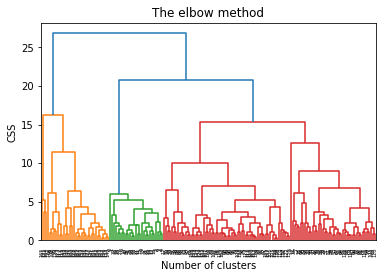

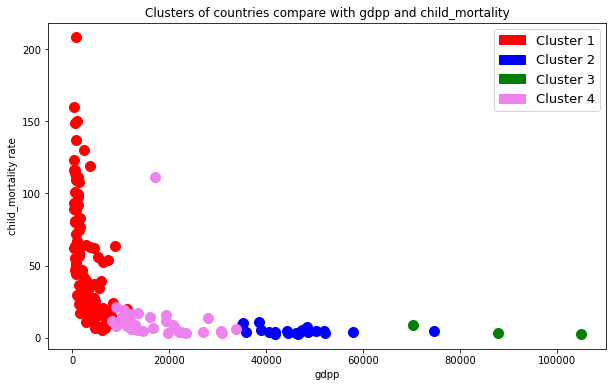

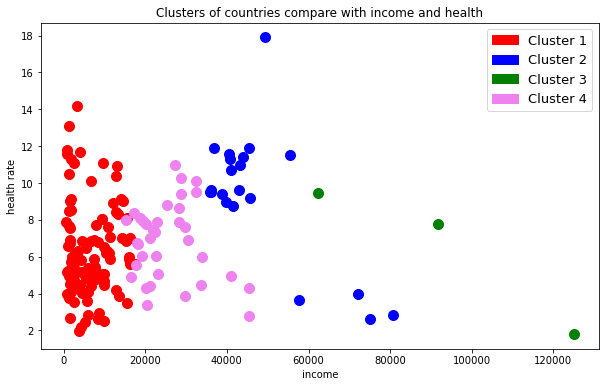

In [2]:
# k-means
from sklearn.cluster import KMeans
css=[]
# Finding inertia on various k values
for i in range(1,8):
    k_mean=KMeans(n_clusters = i).fit(data1.values)
    css.append(k_mean.inertia_)
    
    
plt.plot(range(1, 8), css, 'bx-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')

dendrogram1 = dendrogram(linkage(data_scaled,method = "ward"))
X = data.iloc[:, 1:].values

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
pred = kmeans.fit_predict(X)
pred
# plot of gdp vs child_mortality rate
gdpp_index = list(data.columns).index('gdpp') - 1
child_index = list(data.columns).index('child_mort') - 1
import matplotlib.patches as ptch

plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
violet_patch = ptch.Patch(color="violet", label="Cluster 4")
plt.legend(handles=[red_patch, blue_patch, green_patch,violet_patch], loc=1, prop={'size': 13})
plt.title('Clusters of countries compare with gdpp and child_mortality')
plt.xlabel('gdpp')
plt.ylabel('child_mortality rate')
plt.scatter(X[pred == 0, gdpp_index], X[pred== 0, child_index], s = 100, c = 'red')
plt.scatter(X[pred == 1, gdpp_index], X[pred == 1, child_index], s = 100, c = 'blue')
plt.scatter(X[pred == 2, gdpp_index], X[pred == 2, child_index], s = 100, c = 'green')
plt.scatter(X[pred ==3,gdpp_index],X[pred == 3,child_index],marker = "o",s = 100,c= 'violet')
# gdp vs health
income_index = list(data.columns).index('income') - 1
health_index = list(data.columns).index('health') - 1
import matplotlib.patches as ptch

plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
violet_patch = ptch.Patch(color="violet", label="Cluster 4")
plt.legend(handles=[red_patch, blue_patch, green_patch,violet_patch], loc=1, prop={'size': 13})
plt.title('Clusters of countries compare with income and health')
plt.xlabel('income')
plt.ylabel('health rate')
plt.scatter(X[pred == 0, income_index], X[pred== 0, health_index], s = 100, c = 'red')
plt.scatter(X[pred == 1, income_index], X[pred == 1, health_index], s = 100, c = 'blue')
plt.scatter(X[pred == 2, income_index], X[pred == 2, health_index], s = 100, c = 'green')
plt.scatter(X[pred ==3,income_index],X[pred == 3,health_index],marker = "o",s = 100,c= 'violet')

T_U_C = list(data.iloc[:,0].values[pred==0])
print('Top_5_undeveloped_countries :',T_U_C[0],T_U_C[1],T_U_C[2],T_U_C[4],T_U_C[5])
print('Top_undeveloped_countries_immediate_fund :')
for i in enumerate(T_U_C):
    print(i)

Top_5_undeveloped_countries : Haiti Sierra Leone Chad Mali Nigeria
Top_undeveloped_countries_immediate_fund :
(0, 'Haiti')
(1, 'Sierra Leone')
(2, 'Chad')
(3, 'Central African Republic')
(4, 'Mali')
(5, 'Nigeria')
(6, 'Niger')
(7, 'Angola')
(8, 'Burkina Faso')
(9, 'Congo, Dem. Rep.')
(10, 'Guinea-Bissau')
(11, 'Benin')
(12, "Cote d'Ivoire")
(13, 'Guinea')
(14, 'Cameroon')
(15, 'Mozambique')
(16, 'Lesotho')
(17, 'Mauritania')
(18, 'Burundi')
(19, 'Pakistan')
(20, 'Malawi')
(21, 'Togo')
(22, 'Afghanistan')
(23, 'Liberia')
(24, 'Comoros')
(25, 'Zambia')
(26, 'Uganda')
(27, 'Gambia')
(28, 'Lao')
(29, 'Sudan')
(30, 'Ghana')
(31, 'Tanzania')
(32, 'Senegal')
(33, 'Myanmar')
(34, 'Congo, Rep.')
(35, 'Gabon')
(36, 'Rwanda')
(37, 'Kiribati')
(38, 'Timor-Leste')
(39, 'Madagascar')
(40, 'Kenya')
(41, 'Turkmenistan')
(42, 'India')
(43, 'Yemen')
(44, 'Namibia')
(45, 'Eritrea')
(46, 'South Africa')
(47, 'Botswana')
(48, 'Tajikistan')
(49, 'Bangladesh')
(50, 'Nepal')
(51, 'Bolivia')
(52, 'Cambodia')
(

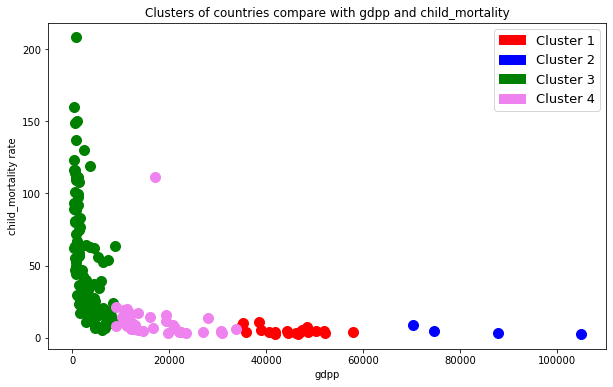

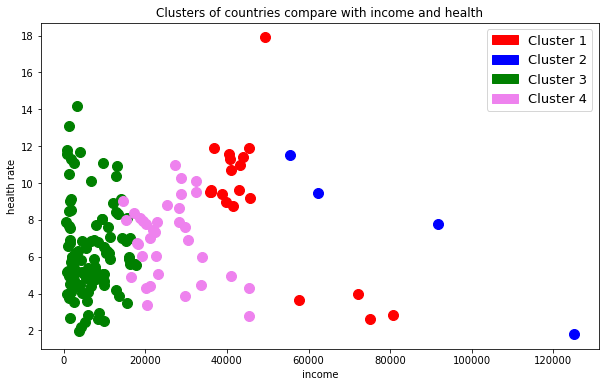

In [3]:
# Hierchical clustering
Hierchical = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
pred = Hierchical.fit_predict(X)
# plot of gdp vs child_mortality rate
gdpp_index = list(data.columns).index('gdpp') - 1
child_index = list(data.columns).index('child_mort') - 1
import matplotlib.patches as ptch

plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
violet_patch = ptch.Patch(color="violet", label="Cluster 4")
plt.legend(handles=[red_patch, blue_patch, green_patch,violet_patch], loc=1, prop={'size': 13})
plt.title('Clusters of countries compare with gdpp and child_mortality')
plt.xlabel('gdpp')
plt.ylabel('child_mortality rate')
plt.scatter(X[pred == 0, gdpp_index], X[pred== 0, child_index], s = 100, c = 'red')
plt.scatter(X[pred == 1, gdpp_index], X[pred == 1, child_index], s = 100, c = 'blue')
plt.scatter(X[pred == 2, gdpp_index], X[pred == 2, child_index], s = 100, c = 'green')
plt.scatter(X[pred ==3,gdpp_index],X[pred == 3,child_index],marker = "o",s = 100,c= 'violet')
# gdp vs health
income_index = list(data.columns).index('income') - 1
health_index = list(data.columns).index('health') - 1
import matplotlib.patches as ptch

plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
violet_patch = ptch.Patch(color="violet", label="Cluster 4")
plt.legend(handles=[red_patch, blue_patch, green_patch,violet_patch], loc=1, prop={'size': 13})
plt.title('Clusters of countries compare with income and health')
plt.xlabel('income')
plt.ylabel('health rate')
plt.scatter(X[pred == 0, income_index], X[pred== 0, health_index], s = 100, c = 'red')
plt.scatter(X[pred == 1, income_index], X[pred == 1, health_index], s = 100, c = 'blue')
plt.scatter(X[pred == 2, income_index], X[pred == 2, health_index], s = 100, c = 'green')
plt.scatter(X[pred ==3,income_index],X[pred == 3,health_index],marker = "o",s = 100,c= 'violet')

T_U_C = list(data.iloc[:,0].values[pred==2])
print('Top_5_undeveloped_countries :',T_U_C[0],T_U_C[1],T_U_C[2],T_U_C[4],T_U_C[5])
print('Top_undeveloped_countries_immediate_fund :')
for i in enumerate(T_U_C):
    print(i)

0.999996525238076


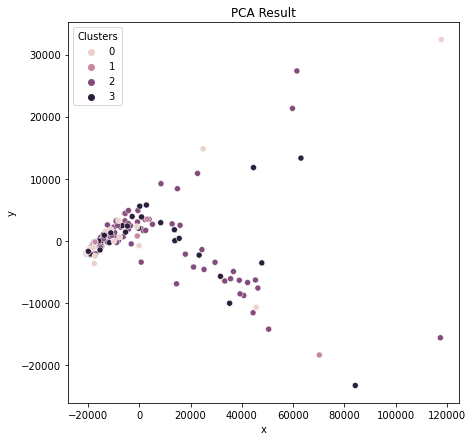

In [4]:
#PCA
from sklearn.decomposition import PCA as pca
PCA_SKlearn = pca(n_components=0.95)
data_scaled = PCA_SKlearn.fit_transform(data1)
print(PCA_SKlearn.explained_variance_ratio_.sum())

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data = pca.fit_transform(data1)
data
data1 = pd.DataFrame({'x':data[:,0],'y':data[:,1],'Clusters':pred})
plt.figure(figsize=(7,7))
sns.scatterplot(data=data1,x='x',y='y',hue='Clusters')
plt.title('PCA Result')
plt.show()
